# 1.Problem Stament

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

# 2.Hypothesis Genaration

After implementing several models based on using best model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

In [1]:
import pandas as pd
import numpy as np

In [4]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
data = pd.read_csv("F:\\technocolabs\\mini project\\dataset\\Train.csv")

# Hypothesis 1: Item MRP has a positive effect on Item Outlet Sales
group1 = data[data['Item_Outlet_Sales'] > 0]['Item_MRP']
group2 = data[data['Item_Outlet_Sales'] == 0]['Item_MRP']

# Perform a t-test to compare the means of the two groups
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

if p_value < 0.05:
    print("Hypothesis 1 is supported.")
else:
    print("Hypothesis 1 is not supported.")

# Hypothesis 2: Item Fat Content affects Item Outlet Sales
group1 = data[data['Item_Fat_Content'] == 'Low Fat']['Item_Outlet_Sales']
group2 = data[data['Item_Fat_Content'] == 'Regular']['Item_Outlet_Sales']

# Perform a t-test to compare the means of the two groups
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

if p_value < 0.05:
    print("Hypothesis 2 is supported.")
else:
    print("Hypothesis 2 is not supported.")


Hypothesis 1 is not supported.
Hypothesis 2 is not supported.


# 3.Loading packages and data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


Pandas is a very popular data manipulation library,functions is read_csv() which can read any .csv file very easily and help us manipulate it.

In [6]:
train = pd.read_csv('F:\\technocolabs\\mini project\\dataset\\Train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
test = pd.read_csv('F:\\technocolabs\\mini project\\dataset\\Test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# 4. Data  Structure and content

In [8]:
import pandas as pd
data = pd.read_csv("F:\\technocolabs\\mini project\\dataset\\Train.csv")  

In [9]:
print(data.head(3))

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDA15         9.30          Low Fat         0.016047        Dairy   
1           DRC01         5.92          Regular         0.019278  Soft Drinks   
2           FDN15        17.50          Low Fat         0.016760         Meat   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   
2  141.6180            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1          3735.1380  
1               Tier 3  Supermarket Type2           443.4228  
2               Tier 1  Supermarket Type1          2097.2700  


In [11]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
data.shape

(8523, 12)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [23]:
#Transposing Pandas dataframe by a variable
import pandas as pd

df = pd.read_csv("Train internship.csv")

result = df.groupby(['Item_Identifier', 'Item_Fat_Content'])['Item_Outlet_Sales'].mean().reset_index()
print(result)


     Item_Identifier Item_Fat_Content  Item_Outlet_Sales
0              DRA12               LF         992.707800
1              DRA12          Low Fat        2013.778680
2              DRA24          Regular        2246.218971
3              DRA59          Regular        2614.430150
4              DRB01          Low Fat        1518.024000
...              ...              ...                ...
2042           NCZ41          Low Fat        1827.487840
2043           NCZ42               LF        4740.496000
2044           NCZ42          Low Fat        3614.628200
2045           NCZ53          Low Fat        3014.742400
2046           NCZ54          Low Fat        3249.104000

[2047 rows x 3 columns]


Sorting of data can be done using dataframe.sort(). It can be based on multiple variables and ascending or descending both orders.

Code

In [24]:

#Sorting Pandas Dataframe 
#df=pd.read_excel("E:/transpose.xlsx", "Sheet1") #Add by variable name(s) to sort
#print df.sort(['Product','Sales'], ascending=[True, False])

# How to create plots (Histogram, Scatter, Box Plot)

Data visualization always helps to understand the data easily. Python has libraries like matplotlib and seaborn to create multiple graphs effectively. Let’s look at the some of the visualizations to understand below behavior of variable(s) .

The distribution of age
Relation between age and sales; and
If sales are normally distributed or not?

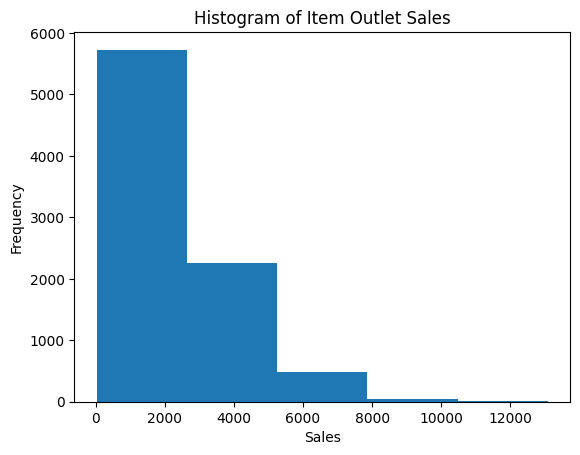

In [15]:
#Plot Histogram
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("F:\\technocolabs\\mini project\\dataset\\Train.csv")

# Plot histogram
plt.hist(df['Item_Outlet_Sales'], bins=5)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Item Outlet Sales')
plt.show()

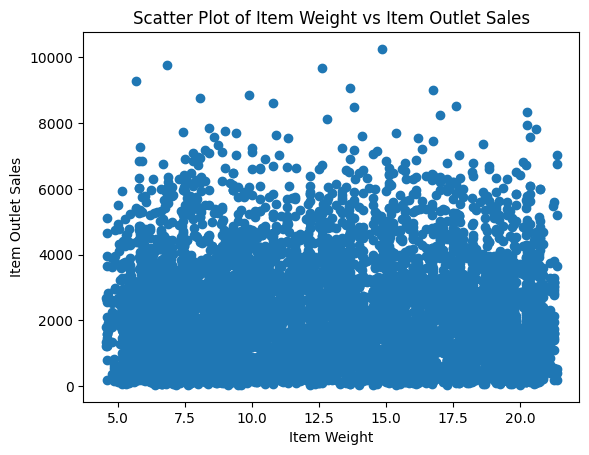

In [16]:
#Scatter plot:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("F:\\technocolabs\\mini project\\dataset\\Train.csv")

# Create scatter plot
plt.scatter(df['Item_Weight'], df['Item_Outlet_Sales'])
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.title('Scatter Plot of Item Weight vs Item Outlet Sales')
plt.show()



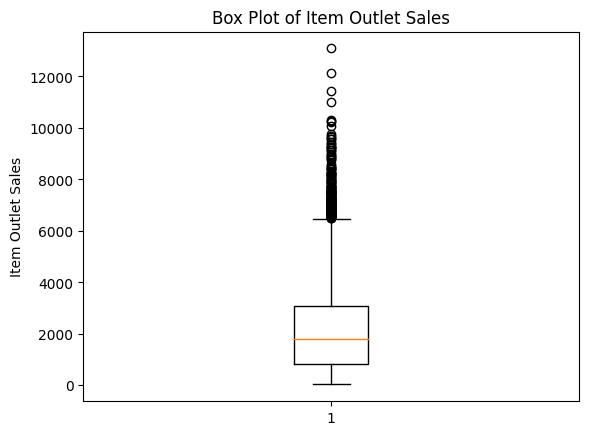

In [17]:
#Box-plot:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("F:\\technocolabs\\mini project\\dataset\\Train.csv")

# Create box plot
plt.boxplot(df['Item_Outlet_Sales'])
plt.ylabel('Item Outlet Sales')
plt.title('Box Plot of Item Outlet Sales')
plt.show()


Frequency Tables can be used to understand the distribution of a categorical variable or n categorical variables using frequency tables.

In [28]:
 
#print df
#test= df.groupby(['Gender','BMI'])
#test.size()


import pandas as pd

# Load the dataset
df = pd.read_csv("Train internship.csv")

# Print the dataframe
print(df)

# Group by 'Item_Fat_Content' and 'Item_Type' columns and get the size/count of each group
grouped = df.groupby(['Item_Fat_Content', 'Item_Type']).size()

# Print the grouped data
print(grouped)


     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [29]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


to remove duplicate values of a variable in a Pandas Dataframe

In [21]:
# Create a new DataFrame with replacement data
encoder = LabelEncoder()
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])

data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])

data['Item_Type'] = encoder.fit_transform(data['Item_Type'])

data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])

data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])

data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])

data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])
     

data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


To understand the count, average and sum of variable, I would suggest you use dataframe.describe() with Pandas groupby().

In [22]:
# Group the DataFrame by 'Item_Fat_Content' and 'Outlet_Location_Type'
grouped = df.groupby(['Item_Fat_Content', 'Outlet_Location_Type'])

# Calculate count, mean, and sum of 'Item_Weight' within each group
count = grouped['Item_Weight'].count()
average = grouped['Item_Weight'].mean()
total = grouped['Item_Weight'].sum()

# Print the results
print("Count:\n", count)
print("Average:\n", average)
print("Total:\n", total)


Count:
 Item_Fat_Content  Outlet_Location_Type
LF                Tier 1                    65
                  Tier 2                    95
                  Tier 3                   100
Low Fat           Tier 1                  1112
                  Tier 2                  1679
                  Tier 3                  1431
Regular           Tier 1                   636
                  Tier 2                   940
                  Tier 3                   812
low fat           Tier 1                    17
                  Tier 2                    35
                  Tier 3                    32
reg               Tier 1                    30
                  Tier 2                    36
                  Tier 3                    40
Name: Item_Weight, dtype: int64
Average:
 Item_Fat_Content  Outlet_Location_Type
LF                Tier 1                  13.461000
                  Tier 2                  12.349316
                  Tier 3                  12.806850
Low Fat    

To identify missing values , we can use dataframe.isnull(). You can also refer article “Data Munging in Python (using Pandas)“, here we have done a case study to recognize and treat missing and outlier values.

In [23]:
# Identify missing values of dataframe
df.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


# 5. Explonatary Data Analysis

We will explore a Data set and perform the exploratory data analysis. The major topics to be covered are below:

— Handle Missing value
— Removing duplicates
— Outlier Treatment
— Normalizing and Scaling( Numerical Variables)
— Encoding Categorical variables( Dummy Variables)
— Bivariate Analysis

# Handling missing value

In [37]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [26]:
import pandas as pd

# Load the dataset
df = pd.read_csv('F:\\technocolabs\\mini project\\dataset\\Train.csv')

# Handle missing values in Item_Weight column by filling with mean
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

# Handle missing values in Outlet_Size column by filling with mode
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

# Check the updated dataset with missing values handled
print(df.isnull().sum())


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [27]:
# Load the dataset
df = pd.read_csv('F:\\technocolabs\\mini project\\dataset\\Train.csv')

# Get the list of categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Fill null values in categorical columns with mode
for col in categorical_columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

# Check the updated dataset with null values replaced
print(df.isnull().sum())


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [28]:
duplicate = train.duplicated()
print(duplicate.sum())
train[duplicate]

0


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


# Handling Outlier

Outliers, being the most extreme observations, may include the sample maximum or sample minimum, or both, depending on whether they are extremely high or low. However, the sample maximum and minimum are not always outliers because they may not be unusually far from other observations.

<AxesSubplot: >

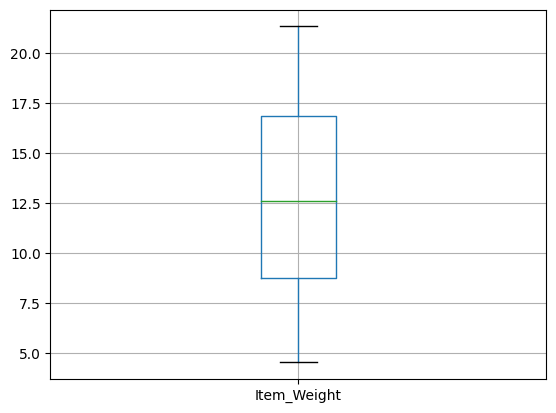

In [29]:
train.boxplot(column=["Item_Weight"])

# 7.Bivariate Analysis

When we talk about bivariate analysis, it means analyzing 2 variables. Since we know there are numerical and categorical variables, there is a way of analyzing these variables as shown below:

In [36]:
import pandas as pd
df=pd.DataFrame(train)
df.corr()

C:\Users\Balu\AppData\Local\Temp\ipykernel_17200\1512903899.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


# Normalizing and Scaling

In [37]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('F:\\technocolabs\\mini project\\dataset\\Train.csv')

# Select the numerical columns for scaling
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Check the updated dataset with normalized and scaled values
print(df.head())


  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15     0.282525          Low Fat         0.048866   
1           DRC01     0.081274          Regular         0.058705   
2           FDN15     0.770765          Low Fat         0.051037   
3           FDX07     0.871986          Regular         0.000000   
4           NCD19     0.260494          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  0.927507            OUT049   
1            Soft Drinks  0.072068            OUT018   
2                   Meat  0.468288            OUT049   
3  Fruits and Vegetables  0.640093            OUT010   
4              Household  0.095805            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [38]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,0.282525,Low Fat,0.048866,Dairy,0.927507,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.283587
1,DRC01,0.081274,Regular,0.058705,Soft Drinks,0.072068,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.031419
2,FDN15,0.770765,Low Fat,0.051037,Meat,0.468288,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.158115
3,FDX07,0.871986,Regular,0.000000,Fruits and Vegetables,0.640093,OUT010,1998,NaN,Tier 3,Grocery Store,0.053555
4,NCD19,0.260494,Low Fat,0.000000,Household,0.095805,OUT013,1987,High,Tier 3,Supermarket Type1,0.073651


# ENCODING

One-Hot-Encoding is used to create dummy variables to replace the categories

In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('F:\\technocolabs\\mini project\\dataset\\Train.csv')

# Select the categorical columns for encoding
categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Perform Label Encoding
encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Check the updated dataset with encoded columns
print(df.head())


  Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0           FDA15         9.30                 1         0.016047          4   
1           DRC01         5.92                 2         0.019278         14   
2           FDN15        17.50                 1         0.016760         10   
3           FDX07        19.20                 2         0.000000          6   
4           NCD19         8.93                 1         0.000000          9   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092            OUT049                       1999            1   
1   48.2692            OUT018                       2009            1   
2  141.6180            OUT049                       1999            1   
3  182.0950            OUT010                       1998            3   
4   53.8614            OUT013                       1987            0   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0                     

In [40]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,1,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,2,0.000000,6,182.0950,OUT010,1998,3,2,0,732.3800
4,NCD19,8.93,1,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052


In [41]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# 6.Univariate Data

In [42]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,1,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.920,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.500,1,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.200,2,0.000000,6,182.0950,OUT010,1998,3,2,0,732.3800
4,NCD19,8.930,1,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1,0.056783,13,214.5218,OUT013,1987,0,2,1,2778.3834
8519,FDS36,8.380,2,0.046982,0,108.1570,OUT045,2002,3,1,1,549.2850
8520,NCJ29,10.600,1,0.035186,8,85.1224,OUT035,2004,2,1,1,1193.1136
8521,FDN46,7.210,2,0.145221,13,103.1332,OUT018,2009,1,2,2,1845.5976


In [43]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [44]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [46]:
import pandas as pd

In [48]:
# Example: Loading data from a CSV file
df = pd.read_csv('F:\\technocolabs\\mini project\\dataset\\Train.csv')


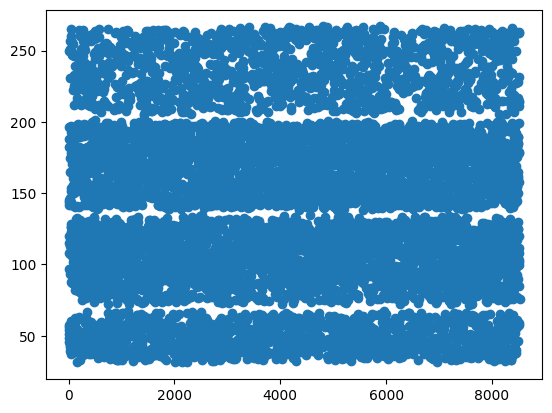

In [55]:
plt.scatter(df.index,df['Item_MRP'])
plt.show()

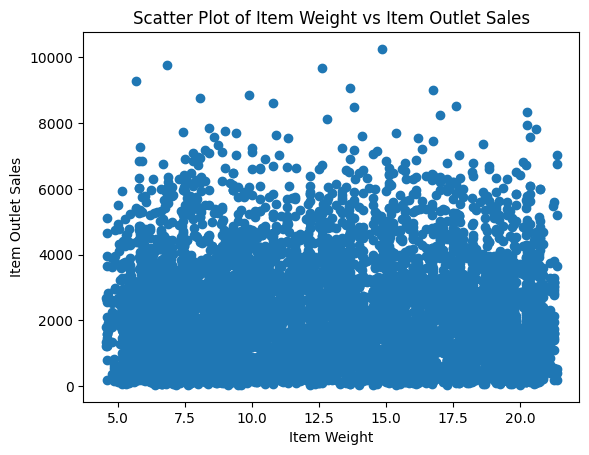

In [56]:
import matplotlib.pyplot as plt

# Specify the x and y variables
x = df['Item_Weight']
y = df['Item_Outlet_Sales']

# Create the scatter plot
plt.scatter(x, y)

# Set labels and title
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.title('Scatter Plot of Item Weight vs Item Outlet Sales')

# Show the plot
plt.show()


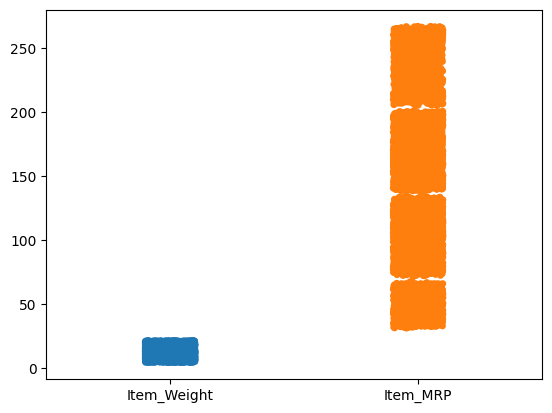

In [57]:
import seaborn as sns

# Select the columns for the strip plot
data = df[['Item_Identifier', 'Item_Weight', 'Item_MRP']]

# Create the strip plot
sns.stripplot(data=data)

# Display the plot
plt.show()


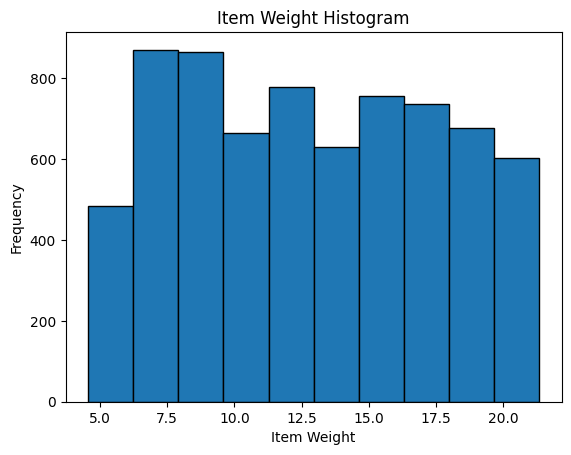

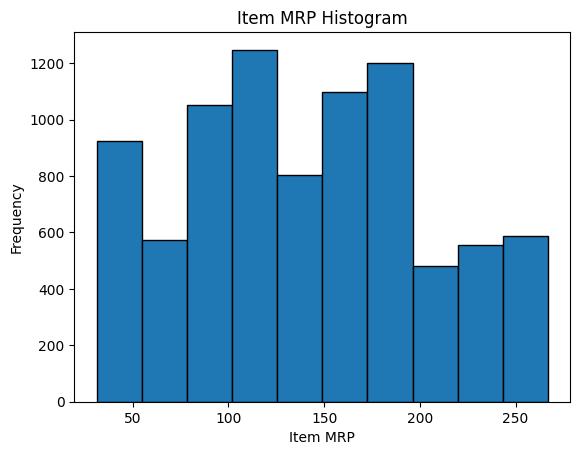

In [59]:
import matplotlib.pyplot as plt

# Select the columns for the histograms
item_weight = df['Item_Weight']
item_mrp = df['Item_MRP']

# Create histograms
plt.hist(item_weight, bins=10, edgecolor='black')
plt.title('Item Weight Histogram')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.show()

plt.hist(item_mrp, bins=10, edgecolor='black')
plt.title('Item MRP Histogram')
plt.xlabel('Item MRP')
plt.ylabel('Frequency')
plt.show()


C:\Users\Balu\AppData\Local\Temp\ipykernel_17200\2769540868.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(item_weight, shade=True)


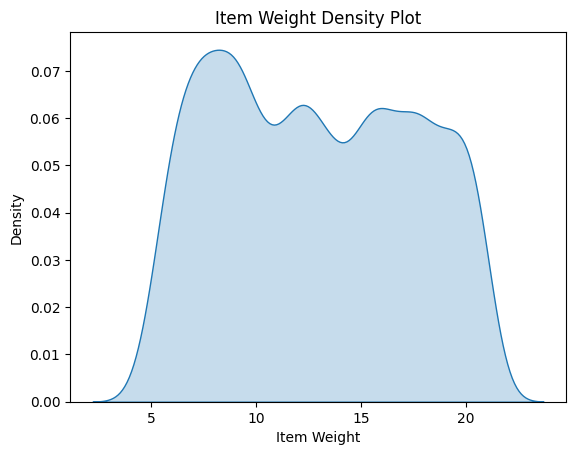

C:\Users\Balu\AppData\Local\Temp\ipykernel_17200\2769540868.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(item_mrp, shade=True)


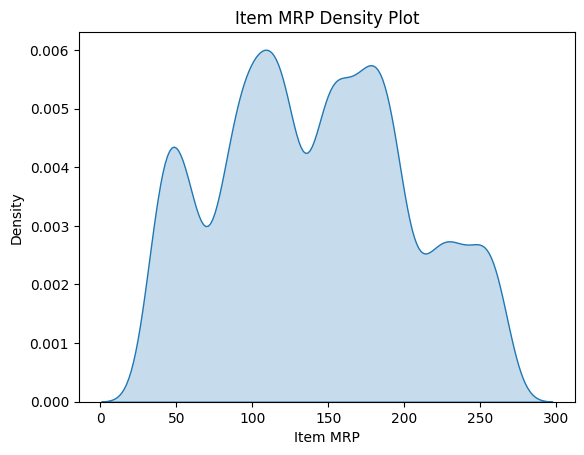

In [60]:
import seaborn as sns

# Select the columns for the density plots
item_weight = df['Item_Weight']
item_mrp = df['Item_MRP']

# Create density plots
sns.kdeplot(item_weight, shade=True)
plt.title('Item Weight Density Plot')
plt.xlabel('Item Weight')
plt.ylabel('Density')
plt.show()

sns.kdeplot(item_mrp, shade=True)
plt.title('Item MRP Density Plot')
plt.xlabel('Item MRP')
plt.ylabel('Density')
plt.show()


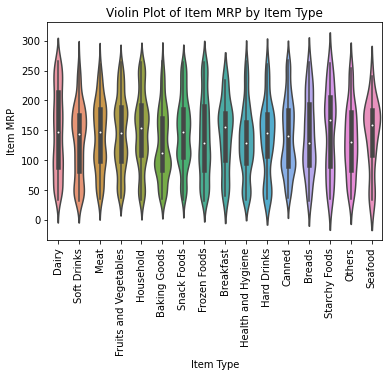

In [68]:
import seaborn as sns

# Create a violin plot
sns.violinplot(x='Item_Type', y='Item_MRP', data=df)
plt.title('Violin Plot of Item MRP by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Item MRP')
plt.xticks(rotation=90)
plt.show()


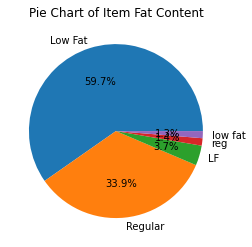

In [70]:
import matplotlib.pyplot as plt

# Calculate the count of each category
fat_content_counts = df['Item_Fat_Content'].value_counts()

# Create a pie chart
plt.pie(fat_content_counts, labels=fat_content_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Item Fat Content')
plt.show()


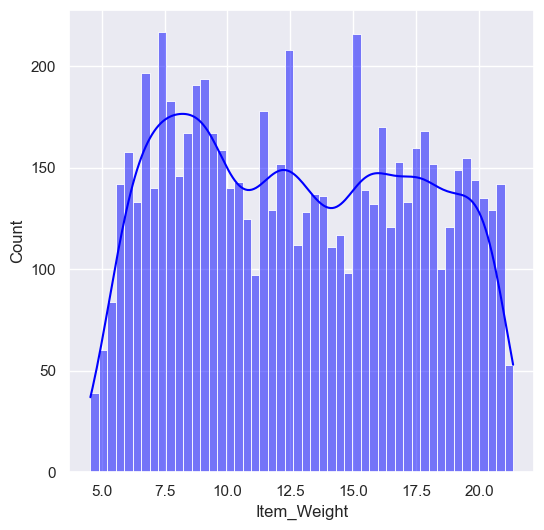

In [61]:
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(df['Item_Weight'],bins=50, kde=True, color='blue')
plt.show()

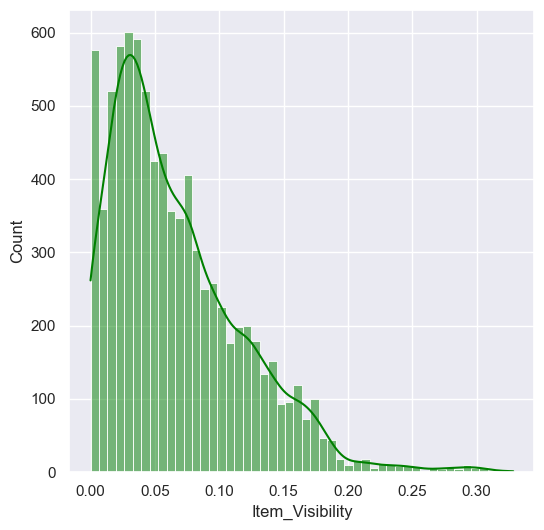

In [62]:
plt.figure(figsize=(6,6))
sns.histplot(df['Item_Visibility'],bins=50, kde=True, color='green')
plt.show()

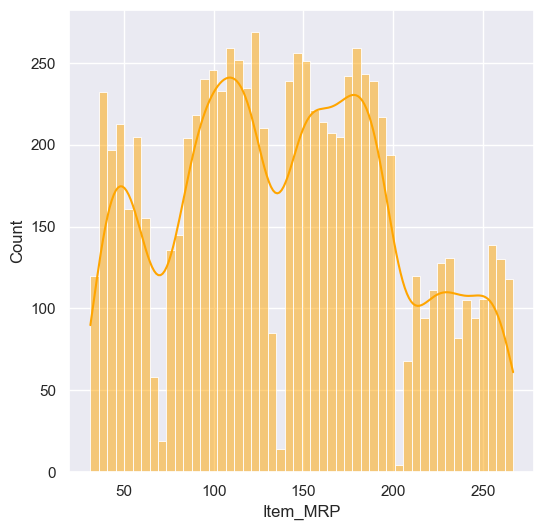

In [63]:

plt.figure(figsize=(6,6))
sns.histplot(df['Item_MRP'],bins=50, kde=True, color='orange')
plt.show()

# 7.Bivariate Analysis

 The underlying idea is to quantify the relationships between each independent variable and dependent variable at certain levels of values for each variable.

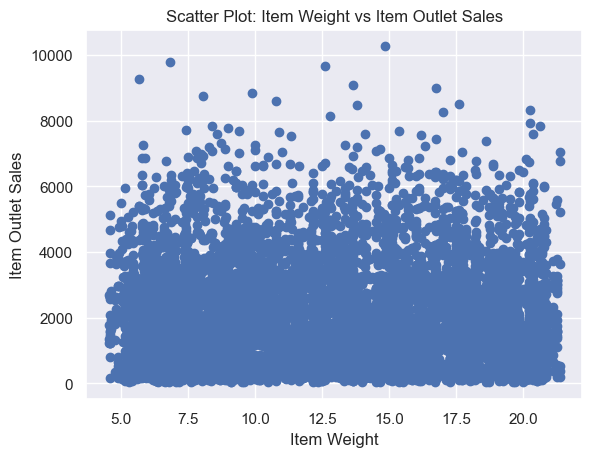

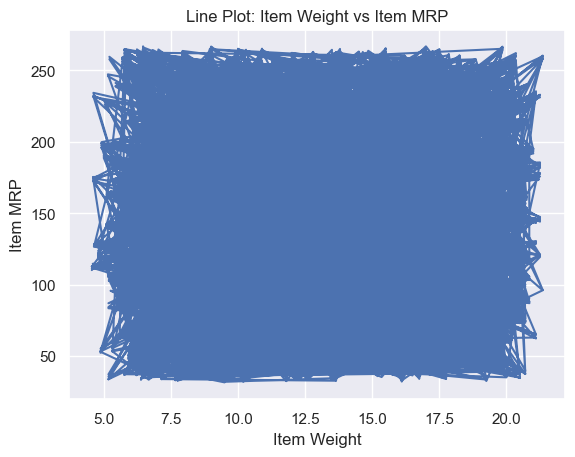

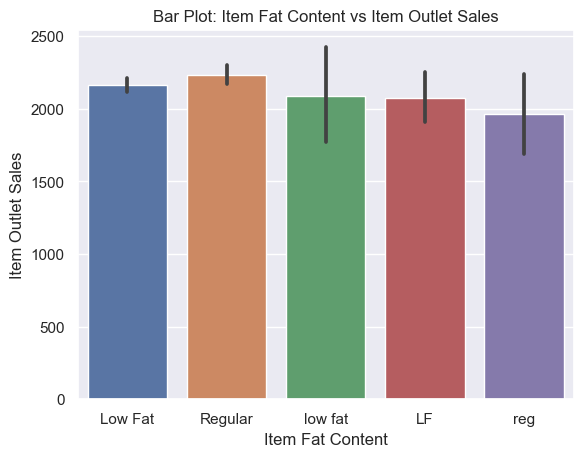

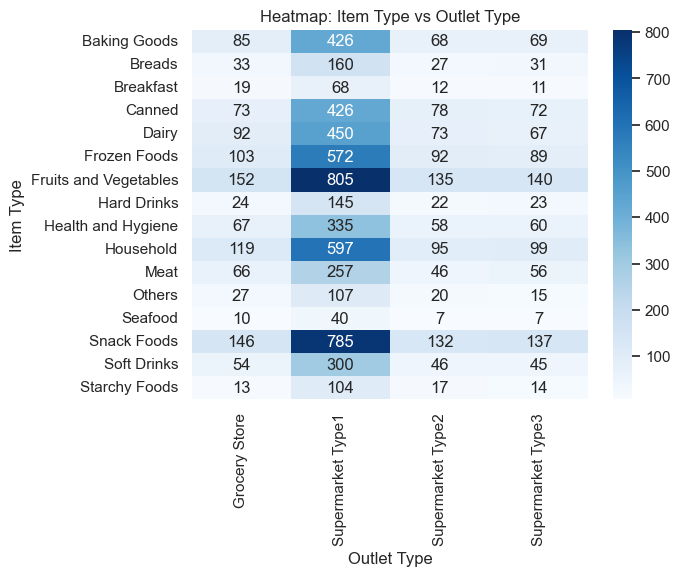

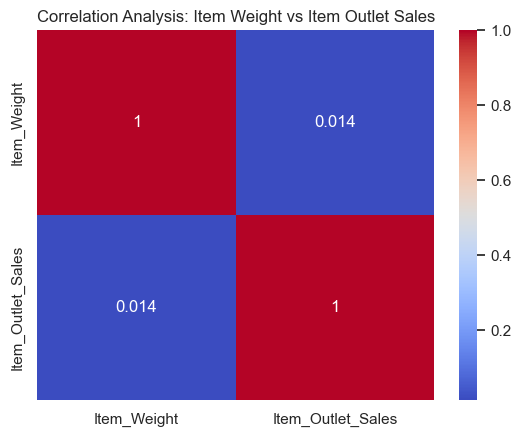

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("F:\\technocolabs\\mini project\\dataset\\Train.csv")

# Scatter plot
plt.scatter(df['Item_Weight'], df['Item_Outlet_Sales'])
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.title('Scatter Plot: Item Weight vs Item Outlet Sales')
plt.show()

# Line plot
plt.plot(df['Item_Weight'], df['Item_MRP'])
plt.xlabel('Item Weight')
plt.ylabel('Item MRP')
plt.title('Line Plot: Item Weight vs Item MRP')
plt.show()

# Bar plot
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)
plt.xlabel('Item Fat Content')
plt.ylabel('Item Outlet Sales')
plt.title('Bar Plot: Item Fat Content vs Item Outlet Sales')
plt.show()

# Heatmap
heatmap_data = df.groupby(['Item_Type', 'Outlet_Type']).size().unstack()
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d')
plt.xlabel('Outlet Type')
plt.ylabel('Item Type')
plt.title('Heatmap: Item Type vs Outlet Type')
plt.show()

# Correlation analysis
correlation_matrix = df[['Item_Weight', 'Item_Outlet_Sales']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis: Item Weight vs Item Outlet Sales')
plt.show()


# 8.Missing Value Treatment

In [66]:
# Drop rows with any missing value
df.dropna(inplace=True)

# Drop columns with any missing value
df.dropna(axis=1, inplace=True)


In [67]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [68]:
train = pd.read_csv("F:\\technocolabs\\mini project\\dataset\\Train.csv")
test = pd.read_csv("F:\\technocolabs\\mini project\\dataset\\Test.csv")

In [69]:
#Combine test and train into one file
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [70]:
#Check missing values:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [71]:
data.Item_Outlet_Sales = data.Item_Outlet_Sales.fillna(data.Item_Outlet_Sales.mean())

In [72]:
data.Item_Weight = data.Item_Weight.fillna(data.Item_Weight.mean())

In [73]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [74]:
data.Outlet_Size = data.Outlet_Size.fillna('Medium')

In [75]:
 data.apply(lambda x: sum(x.isnull()))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

# 9.Feature Engineering

Creating new features from existing features

In [78]:
import pandas as pd


df = pd.read_csv('F:\\technocolabs\\mini project\\dataset\\Train.csv')

df['Item_ID_Category'] = df['Item_Identifier'].str[:2]

df['Outlet_Age'] = 2023 - df['Outlet_Establishment_Year']


category_mapping = {
    'Dairy': 'Food',
    'Soft Drinks': 'Beverages',
    'Meat': 'Food',
    'Fruits and Vegetables': 'Food',
    'Household': 'Non-Food',
}
df['Item_Category'] = df['Item_Type'].map(category_mapping)

df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

df_encoded = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type'])

df_cleaned = df.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1)

print(df_cleaned.head())

   Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low Fat         0.016047                  Dairy   
1         5.92          Regular         0.019278            Soft Drinks   
2        17.50          Low Fat         0.016760                   Meat   
3        19.20          Regular         0.000000  Fruits and Vegetables   
4         8.93          Low Fat         0.000000              Household   

   Item_MRP Outlet_Size Outlet_Location_Type        Outlet_Type  \
0  249.8092      Medium               Tier 1  Supermarket Type1   
1   48.2692      Medium               Tier 3  Supermarket Type2   
2  141.6180      Medium               Tier 1  Supermarket Type1   
3  182.0950      Medium               Tier 3      Grocery Store   
4   53.8614        High               Tier 3  Supermarket Type1   

   Item_Outlet_Sales Item_ID_Category  Outlet_Age Item_Category  
0          3735.1380               FD          24          Food  
1           44

In [79]:
df_cleaned.shape

(8523, 12)

# 10.Evaluating the Categorical Features

In [81]:
print('Frequency of Categories for varible Item ID')
id_counts = df['Item_Identifier'].value_counts()
id_counts.head(10)

Frequency of Categories for varible Item ID


FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
FDV60     9
NCQ06     9
FDF52     9
FDX04     9
NCJ30     9
Name: Item_Identifier, dtype: int64

In [82]:
print('Frequency of Categories for varible Item_Fat_Content')
df['Item_Fat_Content'].value_counts()

Frequency of Categories for varible Item_Fat_Content


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

<AxesSubplot: xlabel='Item_Fat_Content', ylabel='count'>

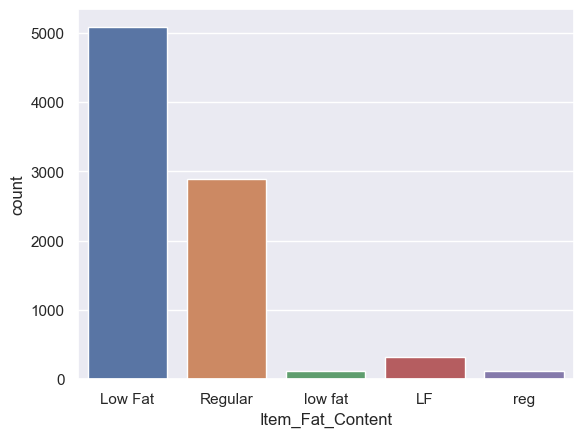

In [84]:
#sns.countplot(df.Item_Fat_Content)
import pandas as pd
import seaborn as sns

# Load the dataset
df = pd.read_csv("F:\\technocolabs\\mini project\\dataset\\Train.csv")

# Plot the count of each category in the "Item_Fat_Content" column
sns.countplot(x="Item_Fat_Content", data=df)



In [85]:
print('Frequency of Categories for varible Item_Type')
df['Item_Type'].value_counts()

Frequency of Categories for varible Item_Type


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [86]:
print('Frequency of Categories for varible Outlet ID')
outlet_id_counts = df['Outlet_Identifier'].value_counts()
outlet_id_counts

Frequency of Categories for varible Outlet ID


OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [87]:
print('Frequency of Categories for varible Outlet_Location_Type')
df['Outlet_Location_Type'].value_counts()

Frequency of Categories for varible Outlet_Location_Type


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

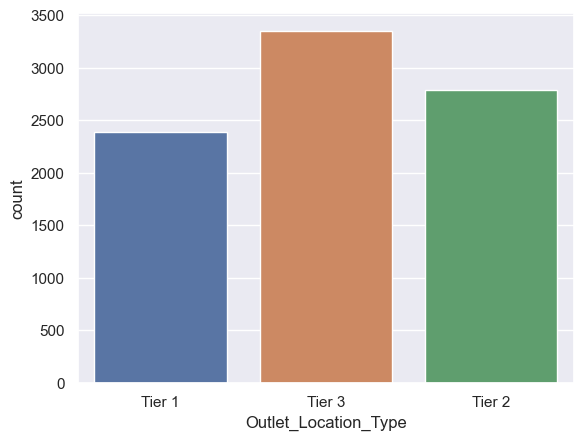

In [88]:
#sns.countplot(df.Outlet_Location_Type)
sns.countplot(x="Outlet_Location_Type", data=df)

# Display the plot
plt.show()

# 12.Numerical and One-Hot Coding of Categorical variables

A one hot encoding is a representation of categorical variables as binary vectors.


In [89]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# 11.Label Encoding

In [90]:
#Import library:
from sklearn.preprocessing import LabelEncoder

def label_encoding(df):
    le = LabelEncoder()
    #New variable for outlet
    df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
    df['Outlet']
    var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
    le = LabelEncoder()
    for i in var_mod:
        df[i] = le.fit_transform(df[i])

In [92]:
label_encoding
encoder = LabelEncoder()

In [93]:
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])

data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])

data['Item_Type'] = encoder.fit_transform(data['Item_Type'])

data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])

data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])

data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])

data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])

In [94]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,train
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228,train
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,train
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800,train
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052,train


# 13.PreProcessing Data

Data preprocessing is the first machine learning step in which we transform raw data obtained from various sources into a usable format to implement accurate machine learning models. In this article, we cover all the steps involved in the data preprocessing phase.

In [95]:
y = df.Item_Outlet_Sales.values
X = df.drop('Item_Outlet_Sales',axis = 1)

In [96]:
print(X.shape,y.shape)

(8523, 11) (8523,)


In [97]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [98]:
cols = [
    'Item_Weight',
    'Item_Visibility',
    'Item_MRP'
]

selected_cols = X[cols]
print(selected_cols)


      Item_Weight  Item_Visibility  Item_MRP
0           9.300         0.016047  249.8092
1           5.920         0.019278   48.2692
2          17.500         0.016760  141.6180
3          19.200         0.000000  182.0950
4           8.930         0.000000   53.8614
...           ...              ...       ...
8518        6.865         0.056783  214.5218
8519        8.380         0.046982  108.1570
8520       10.600         0.035186   85.1224
8521        7.210         0.145221  103.1332
8522       14.800         0.044878   75.4670

[8523 rows x 3 columns]


In [100]:
import numpy as np
import pandas as pd
train=pd.read_csv("F:\\technocolabs\\mini project\\dataset\\Train.csv")
test=pd.read_csv("F:\\technocolabs\\mini project\\dataset\\Test.csv")

In [101]:
# test_df['Item_Outlet_Sales'] = np.nan
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True)
print('After Combining Datasets: ', data.shape)

After Combining Datasets:  (14204, 13)


In [102]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [103]:
# Summary of Dataset Train
data.describe(include=[object, np.number])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
count,14204,11765.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,10188,14204,14204,8523.000000,14204
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN,2
top,FDU15,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN,train
freq,10,NaN,8485,NaN,2013,NaN,1559,NaN,4655,5583,9294,NaN,8523
mean,NaN,12.792854,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,2181.288914,NaN
std,NaN,4.652502,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1706.499616,NaN
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000,NaN
25%,NaN,8.710000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,834.247400,NaN
50%,NaN,12.600000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,1794.331000,NaN
75%,NaN,16.750000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,3101.296400,NaN


# 14.Modeling

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("F:\\technocolabs\\mini project\\dataset\\Train.csv")



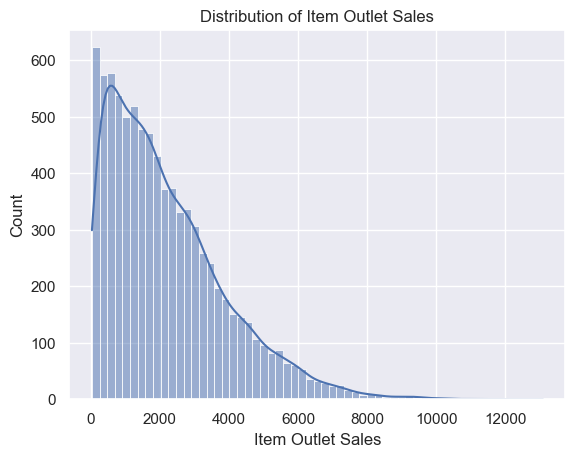

In [106]:

# Visualize the distribution of the target variable
sns.histplot(df["Item_Outlet_Sales"], kde=True)
plt.xlabel("Item Outlet Sales")
plt.ylabel("Count")
plt.title("Distribution of Item Outlet Sales")
plt.show()


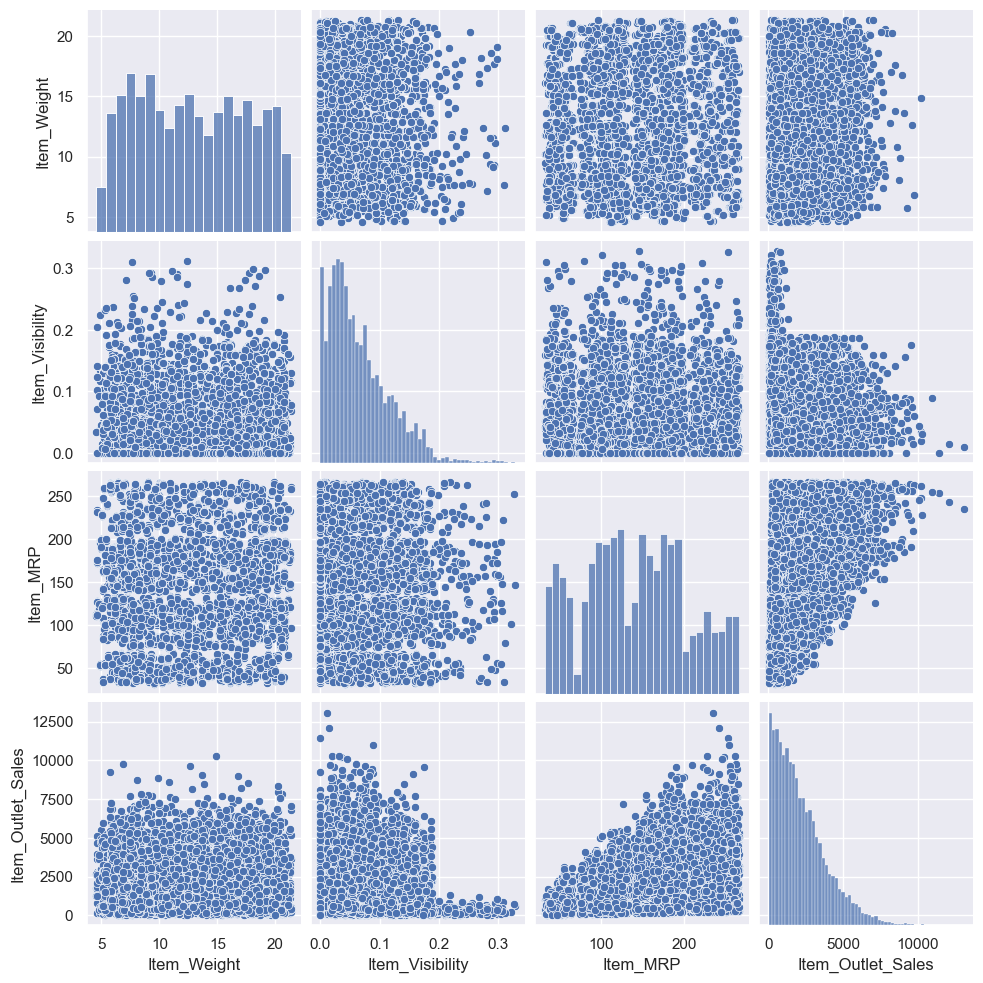

In [107]:

# Visualize the relationship between numerical variables
sns.pairplot(df, vars=["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Outlet_Sales"])
plt.show()


# 15.Linear Regression

Linear regression is probably one of the most important and widely used regression techniques. It’s among the simplest regression methods. One of its main advantages is the ease of interpreting results.

In [111]:
from sklearn.linear_model import LinearRegression
#Training the Simple Linear Regression model on the Training set
model = LinearRegression(normalize=True)

In [112]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,train
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,train
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,train
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,train


In [119]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("F:\\technocolabs\\mini project\\dataset\\Train.csv")

imputer = SimpleImputer(strategy='mean')
data[['Item_Weight']] = imputer.fit_transform(data[['Item_Weight']])

data = pd.get_dummies(data, drop_first=True)

# Split the dataset into input features (X) and target variable (y)
X = data.drop('Item_Outlet_Sales', axis=1)
y = data['Item_Outlet_Sales']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 3.811832641631354e+33
R-squared Score: -1.3633874979156737e+27


# 16.Regularized Linear Regression

In [118]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("F:\\technocolabs\\mini project\\dataset\\Train.csv")

# Drop irrelevant columns
data = data.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

# Handle missing values
data[['Item_Weight']] = data[['Item_Weight']].fillna(data[['Item_Weight']].mean())

# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Split the dataset into input features (X) and target variable (y)
X = data.drop('Item_Outlet_Sales', axis=1)
y = data['Item_Outlet_Sales']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Create a ridge regression model
model = Ridge(alpha=0.5)  # alpha is the regularization parameter

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 1188677.1352935368
R-squared Score: 0.5748429436230851


# RandomForest

In [117]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("F:\\technocolabs\\mini project\\dataset\\Train.csv")

# Drop irrelevant columns
data = data.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

# Handle missing values
data[['Item_Weight']] = data[['Item_Weight']].fillna(data[['Item_Weight']].mean())

# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Split the dataset into input features (X) and target variable (y)
X = data.drop('Item_Outlet_Sales', axis=1)
y = data['Item_Outlet_Sales']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Create a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # n_estimators is the number of trees in the forest

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 1190065.3231689532
R-squared Score: 0.5743464270726389


# XGBoost

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning.

In [120]:
df = pd.read_csv('F:\\technocolabs\\mini project\\dataset\\Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [121]:
df.shape

(8523, 12)

# Data Preprocessing

In [122]:
y = df.Item_Outlet_Sales.values
X = df.drop('Item_Outlet_Sales',axis = 1)

In [123]:
print(X.shape,y.shape)

(8523, 11) (8523,)


In [124]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


# Feature Scaling

Scaling the features using Standard Scaler

In [125]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [126]:
cols = [ 
    'Item_Weight',
    'Item_Visibility',
    'Item_MRP',
]
X[cols]

,Item_Weight,Item_Visibility,Item_MRP
0,9.300,0.016047,249.8092
1,5.920,0.019278,48.2692
2,17.500,0.016760,141.6180
3,19.200,0.000000,182.0950
4,8.930,0.000000,53.8614
...,...,...,...
8518,6.865,0.056783,214.5218
8519,8.380,0.046982,108.1570
8520,10.600,0.035186,85.1224
8521,7.210,0.145221,103.1332


In [128]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("F:\\technocolabs\\mini project\\dataset\\Train.csv")

# Drop irrelevant columns
data = data.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

# Handle missing values
data[['Item_Weight']] = data[['Item_Weight']].fillna(data[['Item_Weight']].mean())

# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Split the dataset into input features (X) and target variable (y)
X = data.drop('Item_Outlet_Sales', axis=1)
y = data['Item_Outlet_Sales']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Create an XGBoost regression model
model = xgb.XGBRegressor(n_estimators=100, random_state=42)  # n_estimators is the number of boosting rounds

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 1224398.6975302016
R-squared Score: 0.5620663251462985
